# Assignment 4 5 Florian Drummen


## Download the data

##  Data Structure

Now we load the data using Pandas

In [1]:
import pandas as pd
train_csv_path = 'C:/Users/fdrum/Documents/ESCP Business School/Machine Learning in Python/Assignments/Assignment 4/Data/train.csv'
test_csv_path= 'C:/Users/fdrum/Documents/ESCP Business School/Machine Learning in Python/Assignments/Assignment 4/Data/test.csv'
train_ds = pd.read_csv(train_csv_path)
test_ds = pd.read_csv(test_csv_path)

train_ds.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N4,N5,N6,N7,N8,N9,N10,C10,C11,C12
0,-1,61518,19297675,-1,6,928106152,2541203883,3606287998,306394936,2967512603,...,0,0,0,0,0,0,0,1083418268,3831440054,830706566
1,-1,356604,19320277,-1,12,3382400190,2018710401,1302581498,2308170622,2967512603,...,2,0,0,0,6,0,0,2993954402,2379633508,1284343215
2,-1,603441,19346318,-1,20,2569487005,2018710401,4121075497,2210625817,2967512603,...,0,0,0,0,0,0,0,1601090997,3617851689,4220791646
3,-1,192754,19308171,-1,9,2569487005,2018710401,3531445293,652481754,2967512603,...,0,0,0,0,0,0,0,4114483006,3617851689,4220791646
4,-1,210892,19309442,-1,9,1659166197,2018710401,1047694444,2210625817,2967512603,...,0,0,0,0,0,0,0,1971402551,2196958187,830706566


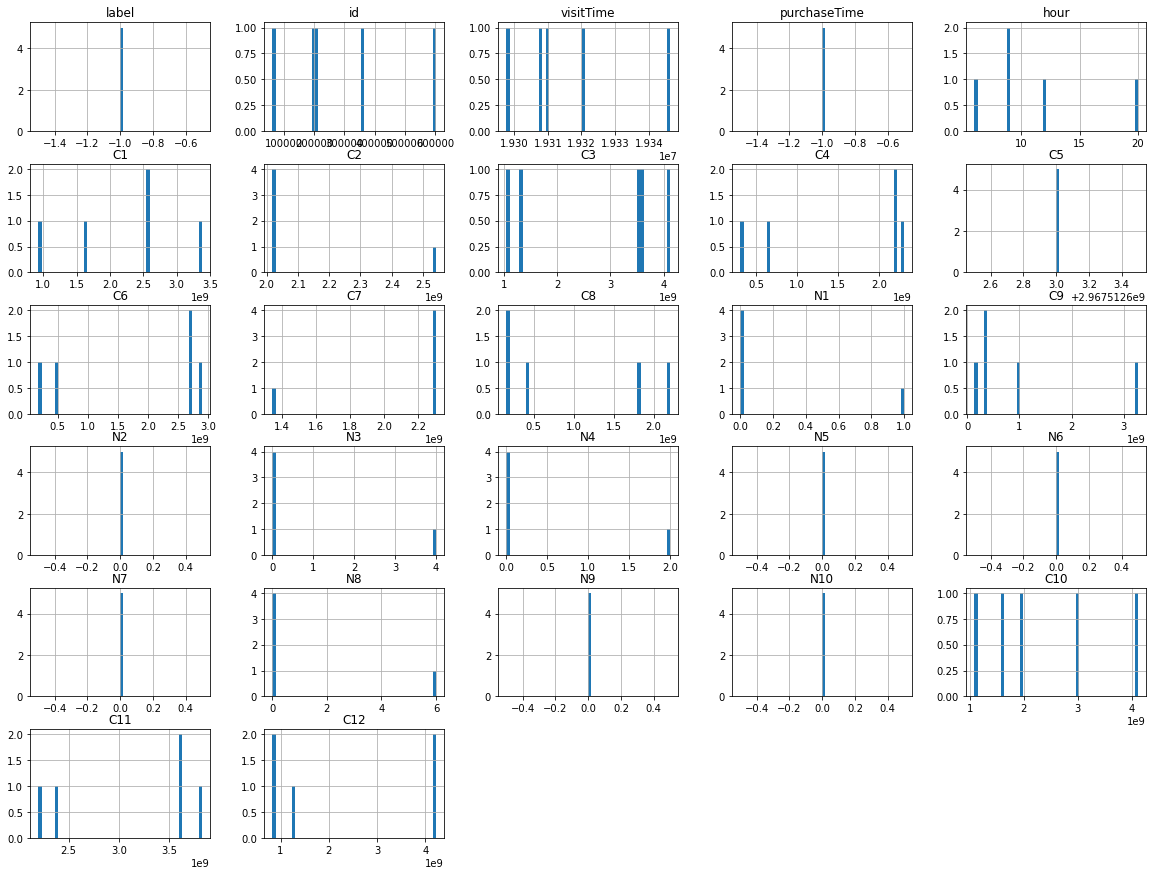

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
train_ds.head().hist(bins=50, figsize=(20,15))
plt.show()

##  Correlations

Since the dataset is not too large, you can easily compute the <code style="background:#FAF99B"><u>*standard correlation coefficient*</u></code> (also called Pearson’s *r* ) between every pair of attributes using the <u><code style="background:#FBCCCA">**corr()**</u> </code>
method:

In [3]:
corr_matrix = train_ds.corr()
corr_matrix["label"].sort_values(ascending=False)

label           1.000000
purchaseTime    1.000000
N9              0.514412
N10             0.470503
N8              0.232069
N6              0.230524
N4              0.203383
N3              0.117648
N7              0.092622
N5              0.071254
N1              0.041259
C9              0.029978
C6              0.017486
C5              0.008654
N2              0.008043
id              0.006510
hour            0.005959
visitTime       0.005782
C8              0.004194
C2              0.003435
C3             -0.000707
C11            -0.001280
C1             -0.002729
C10            -0.005066
C4             -0.005857
C12            -0.016744
C7             -0.036506
Name: label, dtype: float64

Another way to check for correlation between attributes is to use Pandas’<u><code style="background:#FBCCCA">scatter_matrix</u></code> function, which plots every numerical attribute against every other numerical attribute. We will focus on a few key ones to reduce the outputted graphs.

array([[<AxesSubplot:xlabel='N9', ylabel='N9'>,
        <AxesSubplot:xlabel='N10', ylabel='N9'>,
        <AxesSubplot:xlabel='C7', ylabel='N9'>,
        <AxesSubplot:xlabel='C12', ylabel='N9'>],
       [<AxesSubplot:xlabel='N9', ylabel='N10'>,
        <AxesSubplot:xlabel='N10', ylabel='N10'>,
        <AxesSubplot:xlabel='C7', ylabel='N10'>,
        <AxesSubplot:xlabel='C12', ylabel='N10'>],
       [<AxesSubplot:xlabel='N9', ylabel='C7'>,
        <AxesSubplot:xlabel='N10', ylabel='C7'>,
        <AxesSubplot:xlabel='C7', ylabel='C7'>,
        <AxesSubplot:xlabel='C12', ylabel='C7'>],
       [<AxesSubplot:xlabel='N9', ylabel='C12'>,
        <AxesSubplot:xlabel='N10', ylabel='C12'>,
        <AxesSubplot:xlabel='C7', ylabel='C12'>,
        <AxesSubplot:xlabel='C12', ylabel='C12'>]], dtype=object)

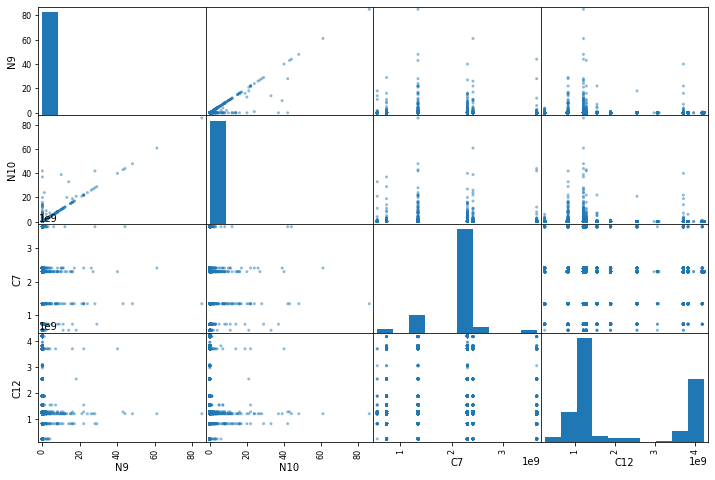

In [4]:
from pandas.plotting import scatter_matrix
attributes = ["N9", "N10", "C7",
"C12"]
scatter_matrix(train_ds[attributes], figsize=(12, 8))



# Data Preparation

## Data Cleaning and labels mapping


In [5]:
train_ds.dropna() # option 1

train_labels = train_ds["label"].copy()
test_labels = test_ds["label"].copy()

Alternatively Scikit-Learn provides a handy class to take care of missing values: <code style="background:#FBCCCA"><u>SimpleImputer</u></code>.

## Select and Train a Model

Let’s first try to train a Linear Regression model:

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(train_ds, train_labels)
#we now have a Log Reg model! Let's see how it performs

some_data = train_ds.iloc[:4]
some_labels = train_labels.iloc[:4]
print("Predictions:", log_reg.predict(some_data))
print("Labels:", list(some_labels))

Predictions: [-1 -1 -1 -1]
Labels: [-1, -1, -1, -1]


In [7]:
import numpy as np
from sklearn.metrics import mean_squared_error
train_predictions = log_reg.predict(train_ds)
lin_mse = mean_squared_error(train_labels, train_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

0.0

this model is showing a problem of <u>**overfitting**</u>.

To solve that we could either:
- use a simpler model
- use regularization

We'll try to train a new model: <code style="background:#FBCCCA"><u>DecisionTreeRegressor</u></code>

In [8]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor()
tree_reg.fit(train_ds, train_labels)

train_predictions = tree_reg.predict(train_ds)
tree_mse = mean_squared_error(train_labels, train_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

0.0

0 Error, still overfitting, let's try a new model:

<code style="background:#FBCCCA"><u>RandomForestRegressor</u></code>. 


In [9]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor()
forest_reg.fit(train_ds, train_labels)
forest_predictions = forest_reg.predict(train_ds)
forest_mse = mean_squared_error(train_labels, forest_predictions)
forest_mse = np.sqrt(forest_mse)
print(forest_mse)

0.0


## Evaluate  on the Test Set
Let's see how our models perform on the test set:

In [10]:
logistic_final_predictions = log_reg.predict(test_ds)
tree_final_predictions = tree_reg.predict(test_ds)
forest_final_predictions = forest_reg.predict(test_ds)
logistic_final_mse = mean_squared_error(test_labels, logistic_final_predictions)
tree_final_mse = mean_squared_error(test_labels, tree_final_predictions)
forest_final_mse = mean_squared_error(test_labels, forest_final_predictions)

logistic_final_mse = np.sqrt(logistic_final_mse)
tree_final_mse = np.sqrt(tree_final_mse)
forest_final_mse = np.sqrt(forest_final_mse)
print(logistic_final_mse,tree_final_mse,forest_final_mse)

0.0 0.0 0.0


In [11]:
logistic_final_predictions_probability = log_reg.predict_proba(test_ds)

In [12]:
logistic_final_predictions_probability

array([[1.00000000e+00, 2.89227214e-18],
       [1.00000000e+00, 1.60200716e-14],
       [1.00000000e+00, 5.55523602e-15],
       ...,
       [1.00000000e+00, 1.13300748e-18],
       [1.00000000e+00, 1.89451987e-19],
       [1.00000000e+00, 1.55345737e-15]])

In [19]:
logistic_final_predictions_probability = log_reg.predict_proba(test_ds)
logistic_final_predictions_probability_score = log_reg.score(test_ds, test_labels)

In [20]:
test_labels

0       -1
1       -1
2       -1
3       -1
4       -1
        ..
32081   -1
32082   -1
32083   -1
32084   -1
32085   -1
Name: label, Length: 32086, dtype: int64

In [21]:
logistic_final_predictions_probability_score

1.0

## Final Output

In [22]:
test_ds['pred'] = logistic_final_predictions
test_ds['Prob'] = logistic_final_predictions_probability_score

In [23]:
test_ds.head()

,label,id,visitTime,purchaseTime,hour,C1,C2,C3,C4,C5,...,N6,N7,N8,N9,N10,C10,C11,C12,pred,Prob
0,-1,25540,19420446,-1,16,2569487005,2018710401,1429850909,2308170622,2967512603,...,0,0,0,0,0,1887882016,3617851689,4220791646,-1,1.0
1,-1,29938,19431062,-1,19,1981742921,1235983246,4203734567,652481754,2116767313,...,0,0,0,0,0,3375463994,2379633508,1284343215,-1,1.0
2,-1,9585,19392956,-1,8,2486871669,1235983246,2776175989,652481754,2116767313,...,0,0,0,0,0,3441876061,2196958187,1550397227,-1,1.0
3,-1,23597,19416124,-1,15,3427628467,1235983246,4172481347,652481754,2116767313,...,0,0,0,0,0,2835356425,3831440054,1213938795,-1,1.0
4,-1,27695,19425109,-1,17,2214885086,2541203883,3948279888,652481754,2967512603,...,0,0,0,0,0,1453469701,3831440054,830706566,-1,1.0


In [24]:
del test_ds['label']
del test_ds['visitTime']
del test_ds['purchaseTime']
del test_ds['hour']
del test_ds['C1']
del test_ds['C2']
del test_ds['C3']
del test_ds['C4']
del test_ds['C5']
del test_ds['C6']
del test_ds['C7']
del test_ds['C8']
del test_ds['N1']
del test_ds['C9']
del test_ds['N2']
del test_ds['N3']
del test_ds['N4']
del test_ds['N5']
del test_ds['N6']
del test_ds['N7']
del test_ds['N8']
del test_ds['N9']
del test_ds['N10']
del test_ds['C10']
del test_ds['C11']
del test_ds['C12']
del test_ds['pred']

In [25]:
test_ds.head()

,id,Prob
0,25540,1.0
1,29938,1.0
2,9585,1.0
3,23597,1.0
4,27695,1.0


In [26]:
test_ds.to_csv('Assignment 4 5 Florian Drummen.csv')